# User Based Recomdation Model

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
amz = pd.read_csv(r"C:\D-Drive\Data Science\Machine Learning\Projects\Building user-based recommendation model for Amazon\Amazon - Movies and TV Ratings.csv")

# Exploratory Data Analysis

In [3]:
amz.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#checking the shape of the data sets
amz.shape

(4848, 207)

In [5]:
amz.describe().T

,count,mean,std,min,25%,50%,75%,max
Movie1,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie2,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie3,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0
Movie4,2.0,5.000000,0.000000,5.0,5.00,5.0,5.0,5.0
Movie5,29.0,4.103448,1.496301,1.0,4.00,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
Movie202,6.0,4.333333,1.632993,1.0,5.00,5.0,5.0,5.0
Movie203,1.0,3.000000,NaN,3.0,3.00,3.0,3.0,3.0
Movie204,8.0,4.375000,1.407886,1.0,4.75,5.0,5.0,5.0
Movie205,35.0,4.628571,0.910259,1.0,5.00,5.0,5.0,5.0


<AxesSubplot:ylabel='Frequency'>

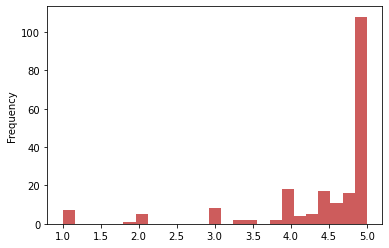

In [6]:
#ploting the mean frequency
amz.describe().T['mean'].plot(bins=25, kind='hist', color = 'indianred')

<AxesSubplot:ylabel='Frequency'>

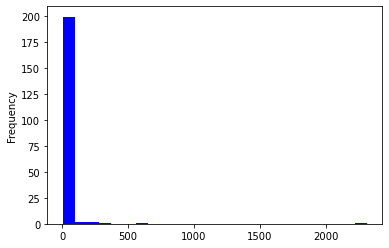

In [7]:
#ploting the count frequency
amz.describe().T['count'].plot(bins=25, kind='hist', color = 'blue')

In [8]:
# Movie that has maxmium view
amz.describe().T['count'].sort_values(ascending=False)[:1].to_frame()

,count
Movie127,2313.0


In [9]:
# Movie that has maxmium ratings
amz.drop('user_id',axis=1).sum().sort_values(ascending=False)[:1].to_frame()

,0
Movie127,9511.0


In [10]:
# Average rating of each movie
amz.drop('user_id',axis=1).mean()

Movie1      5.000000
Movie2      5.000000
Movie3      2.000000
Movie4      5.000000
Movie5      4.103448
              ...   
Movie202    4.333333
Movie203    3.000000
Movie204    4.375000
Movie205    4.628571
Movie206    4.923077
Length: 206, dtype: float64

In [11]:
#top 5 movies with the maximum rating
amz.drop('user_id',axis=1).mean().sort_values(ascending=False)[0:5].to_frame()

,0
Movie1,5.0
Movie55,5.0
Movie131,5.0
Movie132,5.0
Movie133,5.0


In [12]:
# Top 5 movies with least audience
amz.describe().T['count'].sort_values(ascending=True)[:5].to_frame()

,count
Movie1,1.0
Movie71,1.0
Movie145,1.0
Movie69,1.0
Movie68,1.0


# User based Model building

In [13]:
#importing libiraies for model building
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise import SVD
from surprise.model_selection import train_test_split

In [14]:
movie_data = amz.melt(id_vars = amz.columns[0],value_vars=amz.columns[1:],var_name="Movies",value_name="Rating")
movie_data

,user_id,Movies,Rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,NaN
2,A3LKP6WPMP9UKX,Movie1,NaN
3,AVIY68KEPQ5ZD,Movie1,NaN
4,A1CV1WROP5KTTW,Movie1,NaN
...,...,...,...
998683,A1IMQ9WMFYKWH5,Movie206,5.0
998684,A1KLIKPUF5E88I,Movie206,5.0
998685,A5HG6WFZLO10D,Movie206,5.0
998686,A3UU690TWXCG1X,Movie206,5.0


In [15]:
#creating a dataset for training and testing
rd = Reader(rating_scale=(-1,10))
data = Dataset.load_from_df(movie_data.fillna(0),reader=rd)
data

In [16]:
train_data,test_data = train_test_split(data,test_size=0.20)

In [17]:
#Using SVD (Singular Value Descomposition)
svd = SVD()

In [18]:
svd.fit(train_data)

In [19]:
pred = svd.test(test_data)

In [20]:
accuracy.rmse(pred)

RMSE: 0.2779


0.27785656048886365

In [21]:
accuracy.mae(pred)

MAE:  0.0409


0.040913958298123713

In [22]:
u_id='AH3QC2PC1VTGP'
mv = 'Movie206'
r_id = 5.0
svd.predict(u_id, mv, r_ui=r_id, verbose= True)

user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 0.03   {'was_impossible': False}


Prediction(uid='AH3QC2PC1VTGP', iid='Movie206', r_ui=5.0, est=0.02905189657620914, details={'was_impossible': False})

In [23]:
from surprise.model_selection import cross_validate

In [24]:
cross_validate(svd, data, measures = ['RMSE', 'MAE'], cv = 3, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.2813  0.2825  0.2807  0.2815  0.0008  
MAE (testset)     0.0427  0.0425  0.0425  0.0426  0.0001  
Fit time          90.31   78.32   71.14   79.92   7.91    
Test time         8.01    5.68    5.25    6.32    1.21    


{'test_rmse': array([0.28133606, 0.28254176, 0.28071136]),
 'test_mae': array([0.0426969 , 0.04247285, 0.04251161]),
 'fit_time': (90.30860161781311, 78.32233834266663, 71.13521480560303),
 'test_time': (8.013408899307251, 5.683699131011963, 5.253133058547974)}

In [25]:
def repeat(ml_type,dframe,min_,max_):
    rd = Reader()
    data = Dataset.load_from_df(dframe,reader=rd)
    print(cross_validate(ml_type, data, measures = ['RMSE', 'MAE'], cv = 3, verbose = True))
    print("#"*10)
    u_id = 'AH3QC2PC1VTGP'
    m_id = 'Movie206'
    ra_u = 5.0
    print(ml_type.predict(u_id,mv,r_ui=ra_u,verbose=True))
    print("#"*10)
    print()

In [26]:
amz= amz.iloc[:3000, :50]
movie_data = amz.melt(id_vars = amz.columns[0],value_vars=amz.columns[1:],var_name="Movies",value_name="Rating")

In [27]:
repeat(SVD(),movie_data.fillna(0),-1,10)
repeat(SVD(),movie_data.fillna(movie_data.mean()),-1,10)
repeat(SVD(),movie_data.fillna(movie_data.median()),-1,10)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0267  1.0291  1.0314  1.0290  0.0019  
MAE (testset)     1.0113  1.0125  1.0133  1.0124  0.0008  
Fit time          10.10   10.83   10.59   10.51   0.30    
Test time         0.59    0.58    1.02    0.73    0.20    
{'test_rmse': array([1.02665027, 1.02909426, 1.03135772]), 'test_mae': array([1.01130527, 1.01252624, 1.01331082]), 'fit_time': (10.102050304412842, 10.832242727279663, 10.590944528579712), 'test_time': (0.5937082767486572, 0.5780718326568604, 1.0155553817749023)}
##########
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 1.00   {'was_impossible': False}
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 1.00   {'was_impossible': False}
##########

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.0567  0.0573  0.0569  0.0570  0.0003  
MAE (testse

In [28]:
#trying grid search and find optimum hyperparameter value for n_factors
from surprise.model_selection import GridSearchCV

In [29]:
param_grid = {'n_epochs':[20,30],
             'lr_all':[0.005,0.001],
             'n_factors':[50,100]}

In [30]:
gs = GridSearchCV(SVD,param_grid,measures=['rmse','mae'],cv=3)
gs.fit(data)

In [31]:
gs.best_score

{'rmse': 0.28024607615706437, 'mae': 0.04088351386916053}

In [32]:
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

0.28024607615706437
{'n_epochs': 30, 'lr_all': 0.005, 'n_factors': 50}
